## Analyzing the Factors that Won Counter-Strike 2 Rounds at IEM Dallas 2025

### Background

Counter-Strike 2 (CS2) is a first-person shooter esports game made by Valve Corporation. The game is divided into many rounds, where teams play either the Terrorists (T) who try to plant a bomb on a specific parts of the map ("bombsites"), and the Counter-Terrorists (CT) who try to defuse the bomb or kill the terrorists.

<div>
<center><img src="assets/game_screenshot.jpg" width="500"/><br /><b>Sample in-game screenshot of Counter-Strike 2</b></center>
</div>

Teams play 12 rounds on each side (sometimes called "regulation time"), and the first team to get 13 rounds won, wins the game. If both teams reach 12 rounds won, then the game goes into "overtime" (OT), and additional 3 rounds are added to each side, meaning a team wins in overtime if 4 rounds are won. If both teams win 3 rounds in overtime, the game goes into another overtime infinitely until a team wins 4 times in overtime.

At the start of team round, all players get a specific amount of money that can be used to buy various guns and grenades. The grenades, also known as utilities, can be used by players to get information, or for taking control over parts of the map.

<center>
<table>
    <tr>
        <td>
            <center><img src="assets/flashbang.jpg" width="320"/><br /><b>Flashbang</b></center>
        </td>
        <td>
            <center><img src="assets/smoke.jpg" width="320"/><br /><b>Smoke Grenade</b></center>
        </td>
    </tr>
    <tr>
        <td>
            <center><img src="assets/henade.jpg" width="320"/><br /><b>High Explosive Grenade</b></center>
        </td>
        <td>
            <center><img src="assets/molotov.jpg" width="320"/><br /><b>Molotov</b></center>
        </td>
    </tr>
</table>
</center>


The game has developed a competitive esports scene over both it and its prequel, Counter-Strike: Global Offensive's lifetime. Valve Corporation, as well as other entities such as ESL (Electronic Sports League), PGL and Blast, maintain several tourament circuits around the world. We wanted to analyze different factors about how professional CS2 players play. To do this, we are analyzing games played from a single CS2 tournament, and chose ESL's IEM Dallas 2025 due to its recency at the time of writing and its prestige within the Counter-Strike community.

<center><img src="assets/esports.jpg" width="500" /><br /><b>IEM Dallas 2025 Finals (credit: ESL)</b></center>

# Research Question
What are the most prevalent factors that contribute to winning games (maps) of Counter-Strike 2?

## Dataset Description

Our data contains information about the games played during IEM Dallas 2025. It is split across four CSV files: `demos.csv`, `players.csv`, `teams.csv` and `matches.csv`.
Data was scraped from [HLTV.org](https://hltv.org), a widely-used site in the Counter-Strike community that has detailed data
about team and player history, as well as hosts replay files for all esports matches that can be used to get detailed
information about the events that happened in a particular game of Counter-Strike

`demos.csv` contains the bulk of our data, and contains specifically data about how the players played for each map (game) of the tournament.

`players.csv` contains information about the players at the tournament, including some data about their career.

`teams.csv` contains information about the team standings at the tournament.

`matches.csv` contains a list of matches and games that were played at the tournament, along with their HLTV links.

## Structure of the Data

### `demos.csv`

Each row in this file contains the statistics of each player in the game, per round. Each column is an attribute of the players per round

Number of observations: 14280

- `match_id` (int) - Unique ID of the match played
- `map_id` (int) - Unique ID of the map played
- `round_id` (int) - Unique ID of the map played
- `team_name` (string) - Name of the team
- `map_name` (string) - Name of map the round was played on
- `round_number` (int) - The 1-indexed order of the round played in the map (game)
- `round_ct_team` (string) - Team name of the team that is on the CT (Counter-Terrorist) side
- `round_first_site_hit` (A' | 'B') - First bombsite that a team set foot in during a round
- `round_site_hit_time` (float64) - Time it takes for a team to reach a bombsite
- `round_bomb_plant_site` (A' | 'B') - The site where bomb was planted. Null if bomb was not planted.
- `player_planted_bomb` (float64) - The site where bomb was planted. Null if bomb was not planted.
- `round_bomb_plant_time` (float64) - Time since round start that the bomb was defused (in seconds)
- `round_bomb_defuser` (bool) - True if the player defused the bomb, False otherwise
- `bomb_defuse_time` (float64) - Time since round start that the bomb was defused (in seconds)
- `round_length` (float64) - Length of the round (in seconds)
- `round_result` ('T' | 'CT') - Team that won the round
- `round_timeout_called_before` (string) - Team that called timeout before the round. Null if no timeout was called
- `player_name` (string) - Name of player
- `player_flashes_used` (int) - Number of flashbangs the player used in the round
- `player_smokes_used` (int) - Number of smoke grenades the player used in the round
- `player_grenades_used` (int) - Number of explosive grenades the player used in the round
- `player_molotovs_used` (int) - Number of molotovs the player used in the round
- `player_incendiaries_used` (int) - Number of incendiary grenades the player used in the round
- `player_kills` (int) - Number of kills a player got in the round
- `player_died` (bool) - True if the player died in the round
- `player_spent_amount` (int) - Amount of money a player spent in the round
- `player_loadout` (string) - Items a player has in their inventory at the start of the round, deliminated by `, `
- `player_damage` (float64) - Amount of damage a player dealt in the round
- `round_first_killer` (bool) - True if the player drew first blood (first kill) in the round
- `round_first_death` (bool) - True if the player is the first person to die in the round
- `player_headshots` (int) - Number of headshots made by player in a round
- `player_upperbodyshots` (int) - Number of upper body (neck, chest, right_arm, left_arm) shots made by player a round
- `player_stomachshots` (int) - Number of stomach shots made by player a round
- `player_legshots` (string) - Number of leg shots made by player

### `players.csv`

Each row in this file is a player that played in the tournament. Each column refers to an attribute about the players

Number of observations: 80

- `playerid` (int) - Unique ID of the player
- `name` (string) - Name of the player
- `team` (string) - Team name of the player
- `proplayer_since_month` (Month) - Month that the player played on their first team
- `proplayer_since_year` (int) - Year that the player played on their first team
- `on_team_since_month` (Month) - Month that the player played on their current team
- `on_team_since_year` (int) - Year that the player played on their current team
- `is_stand_in` (bool) - True if the player is a stand-in (not officially on roster)
- `has_changed_teams` (bool) - True if the player has changed teams at any point in their career

### `matches.csv`

Each row in this file is a game played in the tournament. Each column is an attribute for the matches

Number of observations: 71

- `matchid` (int) - Unique ID of the player
- `mapid` (int) - Unique ID of the game (map) played
- `team1` (string) - First team of the match
- `team2` (string) - Second team of the match
- `url` (string) - HLTV URL of the match
- `map` (string) - Map the game was played on

### `teams.csv`

Each row in this file is a team that played in the tournament. Each column is an attribute for the teams

Number of observations: 16

- `team_name` (string) - Name of the team
- `tournament_place` (int) - Placement of the team in IEM Dallas 2025


## Data Gathering

For our data gathering, we downloaded replay (demo) files for all games played during IEM Dallas 2025 from HLTV.org, a website that is considered to be the most comprehensive database of Counter-Strike esports data. The files we downloaded ended up being 71 games total. In order to parse these replay files, we used a library called [`demoparser2`](https://github.com/LaihoE/demoparser). This library allows us to read demo files and parse information such as game events, game ticks, and player information.

We created a script called `read_demo.py` that takes in a demo file and creates a CSV file with various statistics for each round and player. We then combine these CSV files with another script called `join_csv.py`. While testing the script, we realized that some games were split into multiple demo files, which were harder to parse, and in the end, we decided to drop these games as these were only 3 out of our entire set.

Another issue we encountered was that our initial `read_demo.py` script incorrectly parsed the side (T or CT) that a team was on, so we had to make a second `get_round_sides.py` script that we used to generate a CSV that was then used to patch the original CSV file we generated.

In addition to the main CSV file, we also manually scraped `matches.csv` and `players.csv` files to augment the information for our analysis. The data for both of these files come from HLTV.org's public data about players and tournaments, and were manually copied into Google Sheets before exporting as CSV.

In summary, the following implications should be noted:
- Some games were dropped due to difficulties in parsing data from split demo files.
- For player inventories, there are times that the player only had their knife, and no guns at the tick the inventory check was done. Checking the demo file in game showed that the player had dropped their gun at this time.
- One of the demos, match `25` game `60`, had an issue where the warmup of the players was included as a "0th round", leading to potential issues about the round number.



# Recreating our Data

To recreate our data, go to all HLTV links in `matches.csv` and click on "Demo Sponsored by BitSkins" to download demos.

Install `demoparser2` by running `pip install demoparser2`

Extract the files and rename each to the convention of `<matchid>_<mapid>.dem`.

For each file, run the following command:
```bash
python read_demo.py /path/to/demo.dem
```

In addition, run:
```bash
python get_round_sides.py
```

Move all of the `.dem.csv` files that were generated to a folder called `csv`. Then, in the directory where `csv` is, run:

```bash
python join_csv.py
```

# Data Cleaning

### Import Libraries and Tables

In [77]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt_pypl
import numpy as np
import adjustText as at
from adjustText import adjust_text

demos = pd.read_csv("demos.csv")
matches = pd.read_csv("matches.csv")
players = pd.read_csv("players.csv")
teams = pd.read_csv("teams.csv")
smokes = pd.read_csv("smokes.csv")

### Team Names

If we read the list of team names in the `players.csv`, `teams.csv` and `demos.csv` files, they differ from each other:

In [78]:
teams_team_names = sorted(teams['team_name'].unique())
demos_team_names = sorted(demos['team_name'].unique())
players_team_names = sorted(players['team'].unique())

pd.DataFrame({
    'teams': teams_team_names,
    'demos': demos_team_names,
    'players': players_team_names
})

,teams,demos,players
0,3DMAX,3DMAX,3DMAX
1,Aurora,Aurora,Aurora
2,BC.Game,BCG,BC.Game
3,FURIA,FURIA,FURIA
4,FaZe,FaZe Clan,FaZe
5,Falcons,G2 Esports,Falcons
6,G2,GamerLegion,G2
7,GamerLegion,HEROIC,GamerLegion
8,HEROIC,LEGACY,HEROIC
9,Legacy,Lynn Vision Gaming,Legacy


Both the `teams.csv` and `players.csv` team names are the same, but the ones in `demos.csv` are different.
We will replace the values in `players.csv` and `teams.csv` since they are smaller files, for performance reasons.

First, we get the differences:

In [79]:
union_ser = pd.Series(np.union1d(teams_team_names, demos_team_names))
intersection_ser = pd.Series(np.intersect1d(teams_team_names, demos_team_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

differences

2                BC.Game
3                    BCG
5                   FaZe
6              FaZe Clan
7                Falcons
8                     G2
9             G2 Esports
12                LEGACY
13                Legacy
14                Liquid
15           Lynn Vision
16    Lynn Vision Gaming
19          Team Falcons
20           Team Liquid
21         Team Vitality
23              Vitality
dtype: object

From here, we can see the following that need to change:

- `BC.Game` -> `BCG`
- `FaZe` -> `FaZe Clan`
- `Falcons` -> `Team Falcons`
- `G2` -> `G2 Esports`
- `Legacy` -> `LEGACY`
- `Liquid` -> `Team Liquid`
- `Lynn Vision` -> `Lynn Vision Gaming`
- `Vitality` -> `Team Vitality`

Now we can fix this:

In [80]:
teams['team_name'] = teams['team_name'].replace('BC.Game', 'BCG')
teams['team_name'] = teams['team_name'].replace('FaZe', 'FaZe Clan')
teams['team_name'] = teams['team_name'].replace('Falcons', 'Team Falcons')
teams['team_name'] = teams['team_name'].replace('G2', 'G2 Esports')
teams['team_name'] = teams['team_name'].replace('Legacy', 'LEGACY')
teams['team_name'] = teams['team_name'].replace('Liquid', 'Team Liquid')
teams['team_name'] = teams['team_name'].replace('Lynn Vision', 'Lynn Vision Gaming')
teams['team_name'] = teams['team_name'].replace('Vitality', 'Team Vitality')

players['team'] = players['team'].replace('BC.Game', 'BCG')
players['team'] = players['team'].replace('FaZe', 'FaZe Clan')
players['team'] = players['team'].replace('Falcons', 'Team Falcons')
players['team'] = players['team'].replace('G2', 'G2 Esports')
players['team'] = players['team'].replace('Legacy', 'LEGACY')
players['team'] = players['team'].replace('Liquid', 'Team Liquid')
players['team'] = players['team'].replace('Lynn Vision', 'Lynn Vision Gaming')
players['team'] = players['team'].replace('Vitality', 'Team Vitality')

Now, we check for differences:

In [81]:
teams_team_names = teams['team_name'].unique()
demos_team_names = demos['team_name'].unique()
players_team_names = players['team'].unique()

union_ser = pd.Series(np.union1d(teams_team_names, demos_team_names))
intersection_ser = pd.Series(np.intersect1d(teams_team_names, demos_team_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

len(differences)

0

As you can see, there are no more differences.

### Player Names

If we read the list of player names in the `players.csv` and `demos.csv` files, they differ from each other:


In [82]:
demos_player_names = demos['player_name'].unique()
players_player_names = players['name'].unique()

union_ser = pd.Series(np.union1d(players_player_names, demos_player_names))
intersection_ser = pd.Series(np.intersect1d(players_player_names, demos_player_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

differences

0           910
1          910-
11     HeavyGoD
12     HeavyGod
22       Mzinho
29       Skullz
36       Techno
37     Techno4K
39    Westmelon
63       mzinho
74       skullz
78    westmelon
84         z4KR
85         z4kr
dtype: object

To determine which names are equivalent to which, we make a DataFrame:

In [83]:
demos_player_names = pd.Series(demos['player_name'].unique())
players_player_names = pd.Series(players['name'].unique())

demos_player_names = demos_player_names[demos_player_names.isin(differences)]
players_player_names = players_player_names[players_player_names.isin(differences)]

pd.DataFrame({'demos': demos_player_names, 'players': players_player_names})

,demos,players
7,Skullz,NaN
17,NaN,Techno
18,NaN,mzinho
19,NaN,910
33,NaN,HeavyGod
50,HeavyGoD,NaN
51,NaN,skullz
52,z4KR,NaN
56,westmelon,NaN
62,NaN,Westmelon


From here, we can see the following that need to change:

- `910` -> `910-`
- `HeavyGod` -> `HeavyGoD`
- `mzinho` -> `mzinho`
- `skullz` -> `Skullz`
- `Techno` -> `Techno4K`
- `Westmelon` -> `westmelon`
- `z4kr` -> `z4KR`

Now we can fix this:

In [84]:
players['name'] = players['name'].replace('910', '910-')
players['name'] = players['name'].replace('HeavyGod', 'HeavyGoD')
players['name'] = players['name'].replace('mzinho', 'Mzinho')
players['name'] = players['name'].replace('skullz', 'Skullz')
players['name'] = players['name'].replace('Techno', 'Techno4K')
players['name'] = players['name'].replace('Westmelon', 'westmelon')
players['name'] = players['name'].replace('z4kr', 'z4KR')

In [85]:
demos_player_names = demos['player_name'].unique()
players_player_names = players['name'].unique()

union_ser = pd.Series(np.union1d(players_player_names, demos_player_names))
intersection_ser = pd.Series(np.intersect1d(players_player_names, demos_player_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

len(differences)

0

Now we can see there are no differences. Now that the primary demo data set is cleaned, we can move onto joining player and team data to the demo data frame. From player we will be adding the number of months since the player started playing professionally and the number of months since the player joined their current team, both to the point of IEM Dallas (May 2025). For the teams, we will be joining the team's placement in the tournament.

In [86]:
# convert debut month to int
players['proplayer_since_month'] = players['proplayer_since_month'].apply(lambda x: pd.to_datetime(x, format='%B').month)
players['proplayer_since_year'] = players['proplayer_since_year'].astype(int)
# convert debut current team to int
players['on_team_since_month'] = players['on_team_since_month'].apply(lambda x: pd.to_datetime(x, format='%B').month)
players['on_team_since_year'] = players['on_team_since_year'].astype(int)

# caclulate months from player's debut month and year to May 2025 when IEM Dallas was played
players['career_length'] = (2025 - players['proplayer_since_year']) * 12 + (5 - players['proplayer_since_month'])
players['curr_team_length'] = (2025 - players['on_team_since_year']) * 12 + (5 - players['on_team_since_month'])
players.rename(columns={'name': 'player_name'}, inplace=True)
players = players[['player_name', 'career_length', 'curr_team_length']]

# perform joins
demos = pd.merge(demos,players,on='player_name',how='inner')
demos = pd.merge(demos, teams, on='team_name', how='inner')

## Player loadouts

Player loadouts are encoded as comma-separated lists, so we turn it into an array. In addition, we need to remove knives,
as it is impossible to drop knives in the game, and different knife skins (cosmetics) are counted as unique items rather
than the same one, even if there is no gameplay effect.

First, we convert to list and get a list of knives:

In [87]:
demos['player_loadout_array'] = demos['player_loadout'].str.split(', ')
unique_items = demos['player_loadout_array'].explode().unique().tolist()
knives = [i for i in unique_items if
          "knife" in i.lower() or
          "daggers" in i.lower() or
          "bayonet" in i.lower() or
          "karambit" in i.lower()]

knives

['Butterfly Knife',
 'Talon Knife',
 'M9 Bayonet',
 'Karambit',
 'Shadow Daggers',
 'Skeleton Knife',
 'Flip Knife',
 'Bayonet',
 'Survival Knife',
 'Nomad Knife',
 'Stiletto Knife',
 'knife_t',
 'knife',
 'Ursus Knife']

Now, we filter:

In [88]:
demos['player_loadout_array'] = demos['player_loadout_array'].apply(lambda l: [i for i in l if i not in knives])
demos['player_loadout_array'].head(10)

0              [Glock-18, C4 Explosive]
1    [Glock-18, Smoke Grenade, Molotov]
2                            [Glock-18]
3      [P250, Smoke Grenade, Flashbang]
4                               [USP-S]
5                [P2000, Smoke Grenade]
6                       [Dual Berettas]
7                               [USP-S]
8                    [USP-S, Flashbang]
9                            [Glock-18]
Name: player_loadout_array, dtype: object

## Removing problematic game

As mentioned before, match `25` game `60` was erroneously encoded by the tournament organizers, leading to potential problems with the data.

In [89]:
demos = demos[demos['map_id'] != 60]

## Exploratory Data Analysis

For our EDA, we will be exploring the different key metrics for each team, each member, and each map.

In [90]:
demos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14070 entries, 0 to 14279
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   match_id                     14070 non-null  int64  
 1   map_id                       14070 non-null  int64  
 2   round_id                     14070 non-null  int64  
 3   team_name                    14070 non-null  object 
 4   map_name                     14070 non-null  object 
 5   round_number                 14070 non-null  int64  
 6   round_ct_team                14070 non-null  object 
 7   round_first_site_hit         8120 non-null   object 
 8   round_site_hit_time          8120 non-null   float64
 9   round_bomb_plant_site        7350 non-null   object 
 10  player_planted_bomb          14070 non-null  bool   
 11  round_bomb_plant_time        7350 non-null   float64
 12  round_bomb_defuser           14070 non-null  bool   
 13  bomb_defuse_time     

In [91]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   team_name         16 non-null     object
 1   tournament_place  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


In [92]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   matchid  71 non-null     int64 
 1   mapid    71 non-null     int64 
 2   team1    71 non-null     object
 3   team2    71 non-null     object
 4   url      71 non-null     object
 5   map      71 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.5+ KB


In [93]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_name       80 non-null     object
 1   career_length     80 non-null     int64 
 2   curr_team_length  80 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.0+ KB


In [94]:
smokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8769 entries, 0 to 8768
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   entityid      8769 non-null   int64  
 1   tick          8769 non-null   int64  
 2   user_name     8769 non-null   object 
 3   x             8769 non-null   float64
 4   y             8769 non-null   float64
 5   z             8769 non-null   float64
 6   round_number  8769 non-null   int64  
 7   map_name      8769 non-null   object 
 8   matchid       8769 non-null   int64  
 9   mapid         8769 non-null   int64  
 10  player_team   8769 non-null   object 
 11  winner        8769 non-null   object 
 12  team_name     8769 non-null   object 
 13  is_win        8769 non-null   bool   
 14  start_tick    8769 non-null   int64  
 15  round_tick    8769 non-null   int64  
dtypes: bool(1), float64(3), int64(7), object(5)
memory usage: 1.0+ MB


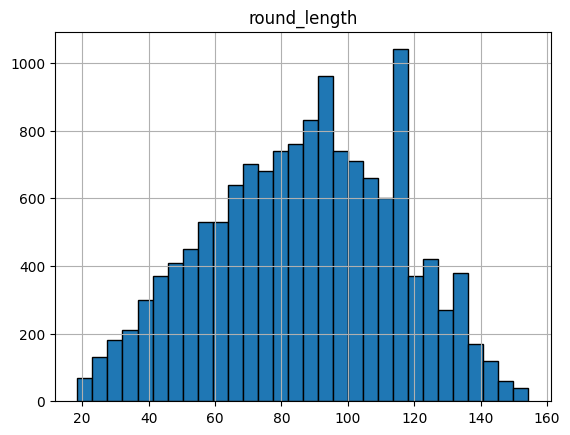

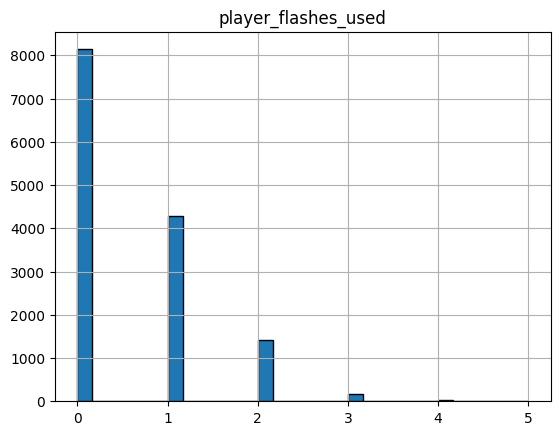

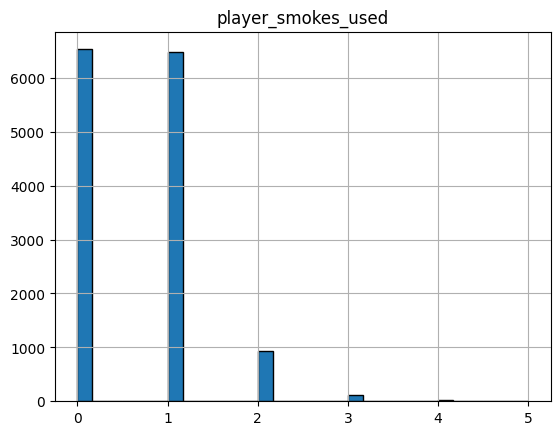

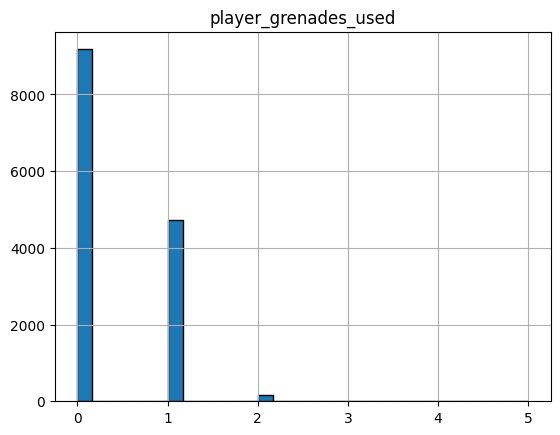

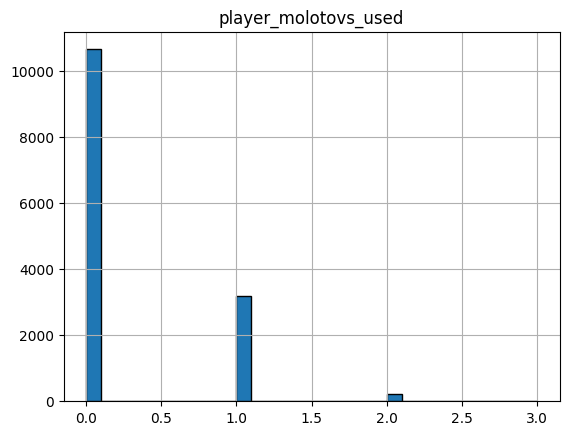

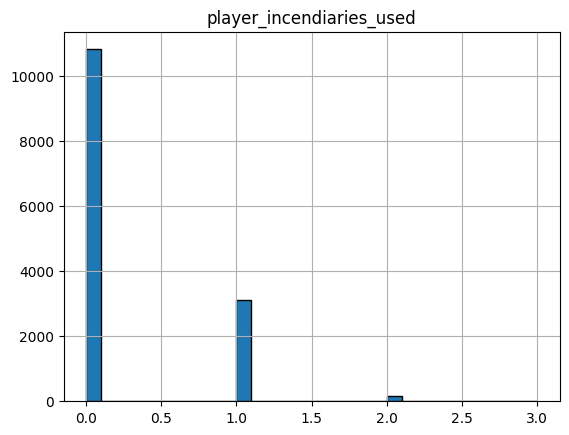

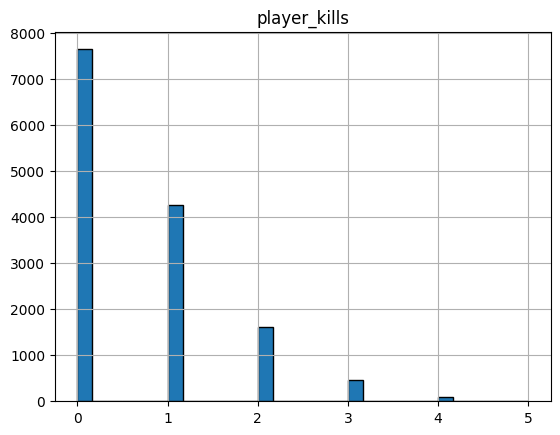

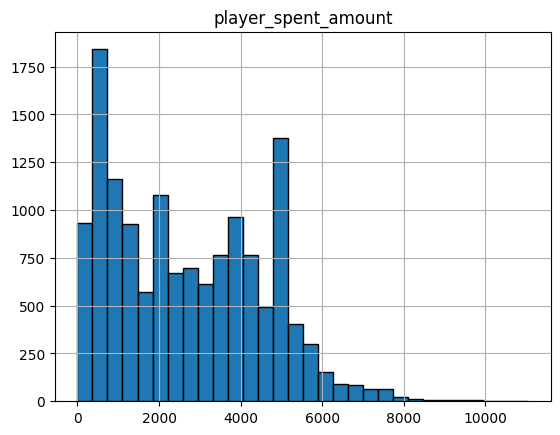

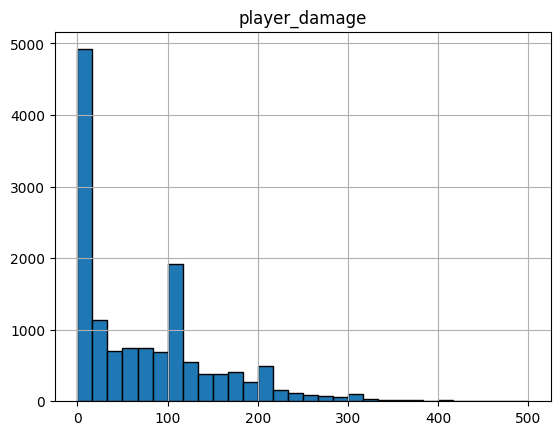

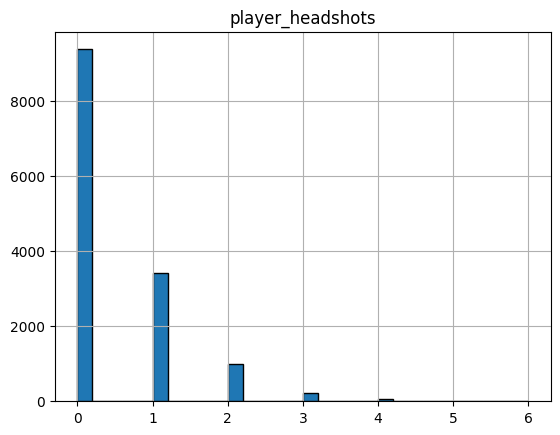

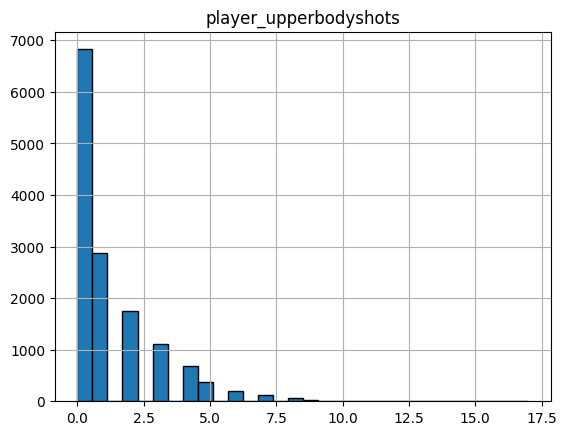

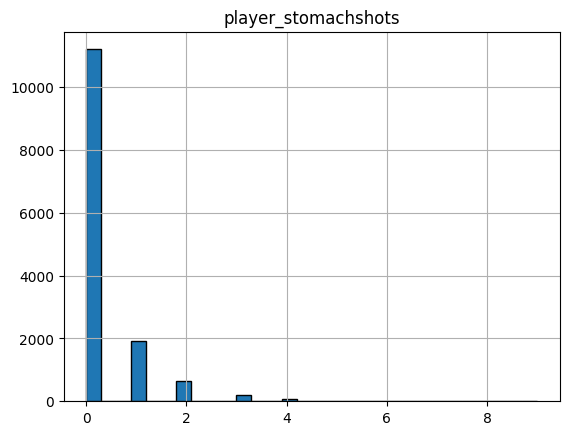

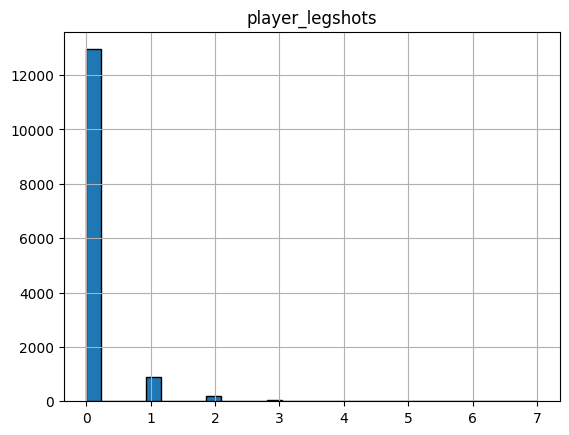

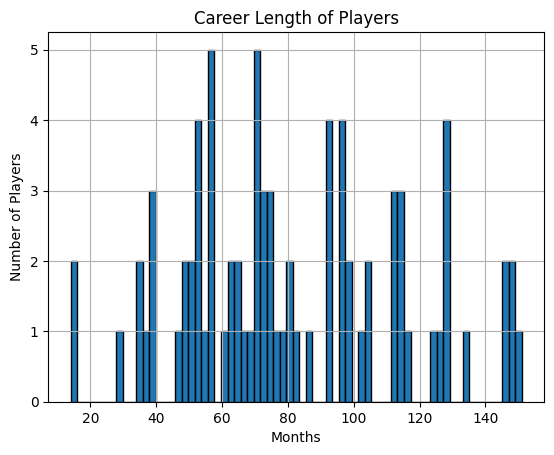

In [95]:
# for each demo column, create a histogram

numerical_cols = [
    "round_length",
    "player_flashes_used",
    "player_smokes_used",
    "player_grenades_used",
    "player_molotovs_used",
    "player_incendiaries_used",
    "player_kills",
    "player_spent_amount",
    "player_damage",
    "player_headshots",
    "player_upperbodyshots",
    "player_stomachshots",
    "player_legshots",
]

for col in numerical_cols:
    demos[col].hist(bins=30, edgecolor="black")
    plt_pypl.title(col)
    plt_pypl.show()

players["career_length"].hist(bins=69, edgecolor="black")
plt_pypl.title("Career Length of Players")
plt_pypl.xlabel("Months")
plt_pypl.ylabel("Number of Players")
plt_pypl.show()

Given that the above data of numerical columns is predominantly skewed, we will be using the median as a measure of central tendency.

### Teams - Exploratory Data Analysis
#### EDA Question #1: What observations can be formed from the visualizations of the metrics of each team?

First we consider the following correlation matrix of the aggregated metrics of each team, aggregated against the number of rounds played by each team.

It should be noted that because we are observing correlation beteween columns which include factors affected by team economy, we drop the first rounds of each halves (i.e. rounds 1 and 13) as these are when the team economy is consistent to both sides with all members starting with $800.

,round_length,team_flashes_used,team_smokes_used,team_grenades_used,team_molotovs_used,team_incendiaries_used,team_kills,team_spent_amount,team_damage,team_headshots,team_upperbodyshots,team_stomachshots,team_legshots,avg_career_length,avg_curr_team_length,tournament_place
round_length,1.000000,0.252195,0.397986,0.165815,0.143473,0.068768,-0.036542,0.111225,-0.043456,-0.006112,0.002649,0.024238,-0.001582,0.025804,-0.002428,-0.044114
team_flashes_used,0.252195,1.000000,0.496334,0.223442,0.472547,0.011724,0.136616,0.253695,0.120324,0.028357,0.041550,0.060808,0.043784,0.043602,0.026486,0.023258
team_smokes_used,0.397986,0.496334,1.000000,0.350013,0.328929,0.151008,0.173736,0.327694,0.155412,0.030725,0.114553,0.125070,0.043566,0.030331,-0.071471,-0.005110
team_grenades_used,0.165815,0.223442,0.350013,1.000000,-0.007195,0.569045,0.288509,0.205514,0.295272,0.014299,0.201664,0.156853,0.097782,0.025682,0.028238,-0.012703
team_molotovs_used,0.143473,0.472547,0.328929,-0.007195,1.000000,-0.555853,0.063423,0.153384,0.042338,0.012389,-0.016557,-0.011294,-0.057103,0.011979,-0.002853,-0.004192
team_incendiaries_used,0.068768,0.011724,0.151008,0.569045,-0.555853,1.000000,0.252726,0.198664,0.257499,0.020145,0.192303,0.185100,0.135023,-0.002013,0.021086,-0.003057
team_kills,-0.036542,0.136616,0.173736,0.288509,0.063423,0.252726,1.000000,0.174500,0.963361,0.565273,0.558961,0.412389,0.200290,0.003682,0.006908,-0.085013
team_spent_amount,0.111225,0.253695,0.327694,0.205514,0.153384,0.198664,0.174500,1.000000,0.158443,-0.011599,0.110233,0.124631,0.065726,-0.002752,-0.021188,0.021184
team_damage,-0.043456,0.120324,0.155412,0.295272,0.042338,0.257499,0.963361,0.158443,1.000000,0.561390,0.581284,0.425013,0.217755,0.006469,0.017578,-0.087349
team_headshots,-0.006112,0.028357,0.030725,0.014299,0.012389,0.020145,0.565273,-0.011599,0.561390,1.000000,0.112840,0.041306,0.022553,0.008277,-0.008369,-0.043527


<Figure size 1000x800 with 0 Axes>

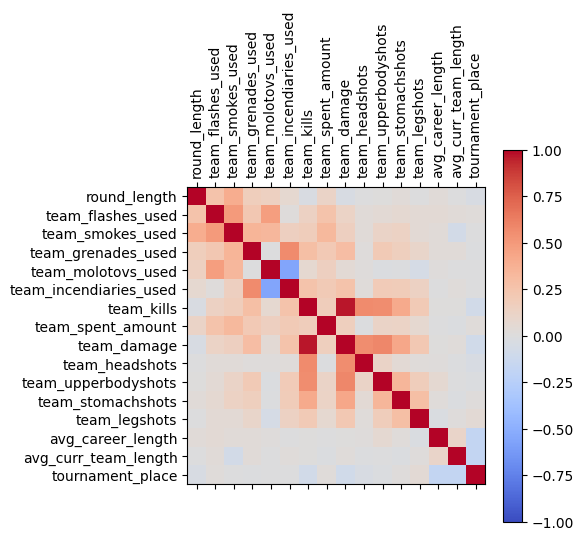

In [96]:
team_stats_aggregator = {
    "round_length": "mean",
    "player_flashes_used": "sum",
    "player_smokes_used": "sum",
    "player_grenades_used": "sum",
    "player_molotovs_used": "sum",
    "player_incendiaries_used": "sum",
    "player_kills": "sum",
    "player_spent_amount": "sum",
    "player_damage": "sum",
    "player_headshots": "sum",
    "player_upperbodyshots": "sum",
    "player_stomachshots": "sum",
    "player_legshots": "sum",
    "career_length": "mean",
    "curr_team_length": "mean",
    "tournament_place": "mean",
}

team_stats_column_names = {
    "player_flashes_used": "team_flashes_used",
    "player_smokes_used": "team_smokes_used",
    "player_grenades_used": "team_grenades_used",
    "player_molotovs_used": "team_molotovs_used",
    "player_incendiaries_used": "team_incendiaries_used",
    "player_kills": "team_kills",
    "player_spent_amount": "team_spent_amount",
    "player_damage": "team_damage",
    "player_headshots": "team_headshots",
    "player_upperbodyshots": "team_upperbodyshots",
    "player_stomachshots": "team_stomachshots",
    "player_legshots": "team_legshots",
    "career_length": "avg_career_length",
    "curr_team_length": "avg_curr_team_length",
}

# filter out pistol rounds
team_stats_normalized = demos[(demos['round_number'] != 1) & (demos['round_number'] != 13)].copy()

team_stats_normalized = team_stats_normalized.groupby(["round_id", "team_name"]).agg(team_stats_aggregator)

team_stats_normalized = team_stats_normalized.rename(columns=team_stats_column_names)

teams_corr = team_stats_normalized.corr(method="spearman")


plt_pypl.figure(figsize=(10, 8))

plt_pypl.matshow(teams_corr, cmap="coolwarm", vmin=-1, vmax=1)

plt_pypl.colorbar()

# if python gives a funny red underline for teams_corr, you can ignore it

plt_pypl.xticks(range(len(teams_corr.columns)), teams_corr.columns, rotation=90)

plt_pypl.yticks(range(len(teams_corr.index)), teams_corr.index)

teams_corr

Reducing and filtering the correlation matrix to unique pairs of columns to those of "strong" (0.6 <= |r| < 0.8) or "very strong" (0.8 <= |r| <= 1.0) correlations, we get the following:

In [97]:
def classify_correlation(corr_val):
    corr_val = abs(corr_val)

    if corr_val >= 0.8:
        return 'very strong'
    elif corr_val >= 0.6:
        return 'strong'
    elif corr_val >= 0.4:
        return 'moderate'
    elif corr_val >= 0.2:
        return 'weak'
    else:
        return 'very weak'


stacked = teams_corr.stack().reset_index()
stacked.columns = ['Column 0', 'Column 1', 'correlation']


stacked['strength_category'] = stacked['correlation'].apply(classify_correlation)

# filter self-correlations and symmetric duplicates
# 
stacked = stacked[stacked['Column 0'] < stacked['Column 1']]

# filter correlations to strong or very strong correlations
significant_corrs = stacked[stacked['correlation'].abs() >= 0.6]

significant_corrs = significant_corrs.sort_values(by=['correlation'], ascending=False).reset_index(drop=True)
significant_corrs

,Column 0,Column 1,correlation,strength_category
0,team_damage,team_kills,0.963361,very strong


We only observe one very strong correlation and no strong correlations. We plot the correlation of this pair.

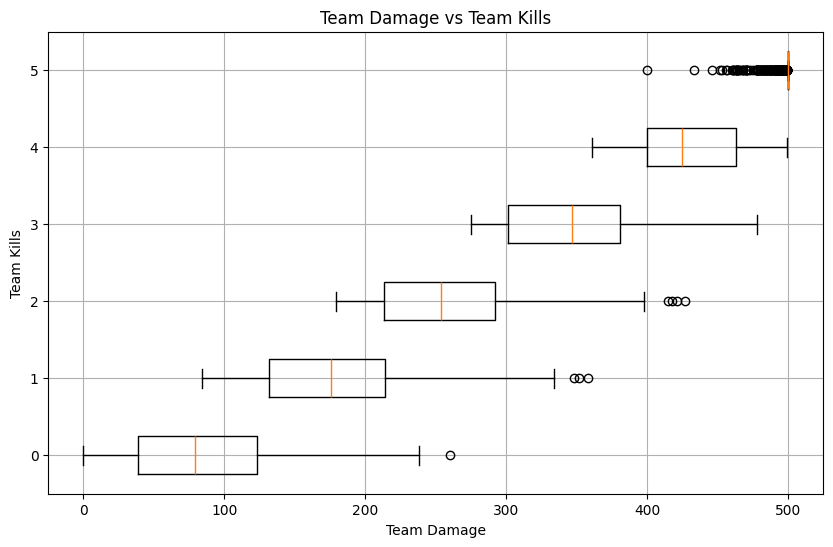

In [98]:
# plot team_damage vs team_kills
kills_grouped = team_stats_normalized.groupby('team_kills')
num_kills = list(kills_grouped['team_damage'].apply(list).index)
plt_pypl.figure(figsize=(10, 6))
plt_pypl.boxplot(kills_grouped['team_damage'].apply(list), vert=False, tick_labels=num_kills)
plt_pypl.xlabel('Team Damage')
plt_pypl.ylabel('Team Kills')
plt_pypl.title('Team Damage vs Team Kills')
plt_pypl.grid(True)
plt_pypl.show()

As shown as expected in the boxplots above, the number of kills tends correlate with the amount of damage dealt by a team in a given round. One thing worth mentioning is the amount of outliers when 5 kills were recorded by a team per round. Theoretically when all 5 players are killed that should translate to 500 damage dealt, but in practice, this is not always the case as a result of non-enemy dealt damage such as fall damage.

We now increase our paramters to include moderate correlations (0.4 <= |r| < 0.6) to see if we can find more interesting pairs.

In [99]:
# filter correlations to moderate or stronger correlations
significant_corrs = stacked[0.4 <= stacked['correlation'].abs()]

significant_corrs = significant_corrs.sort_values(by=['correlation'], ascending=False).reset_index(drop=True)
significant_corrs

,Column 0,Column 1,correlation,strength_category
0,team_damage,team_kills,0.963361,very strong
1,team_damage,team_upperbodyshots,0.581284,moderate
2,team_grenades_used,team_incendiaries_used,0.569045,moderate
3,team_headshots,team_kills,0.565273,moderate
4,team_damage,team_headshots,0.561390,moderate
5,team_kills,team_upperbodyshots,0.558961,moderate
6,team_flashes_used,team_smokes_used,0.496334,moderate
7,team_flashes_used,team_molotovs_used,0.472547,moderate
8,team_damage,team_stomachshots,0.425013,moderate
9,team_kills,team_stomachshots,0.412389,moderate


The above correlation pairs are nothing out of the ordinary and are excpected. Some of the more interesting pairs here include team spending to smokes thrown, .

The only negative correlation we observe here is between incendiaries and molotovs used, this is expected as these items are reserved buys for counter-terrorist and terrorist sides, respectively, hence the opposing side is not supposed to attain these items in-game.

Now let's look at the correlation matrix of CT side teams and T side teams and observe for any changes in correlations.

In [100]:
teams_sep = demos[(demos['round_number'] != 1) & (demos['round_number'] != 13)].copy()

teams_sep["side"] = np.where(teams_sep["team_name"] == teams_sep["round_ct_team"], "CT", "T")

ct_teams = teams_sep[teams_sep["side"] == "CT"]
t_teams = teams_sep[teams_sep["side"] == "T"]

ct_teams = ct_teams.groupby(["team_name", "round_id"]).agg(team_stats_aggregator).rename(columns=team_stats_column_names)
t_teams = t_teams.groupby(["team_name", "round_id"]).agg(team_stats_aggregator).rename(columns=team_stats_column_names)

ct_teams_corr = ct_teams.corr(method="spearman")
t_teams_corr = t_teams.corr(method="spearman")

Let's observe CT side, we filter the correlations to moderate or stronger metrics that were either not present in the complete correlation table or changed in category.

,Column 0,Column 1,correlation,strength_category
0,team_grenades_used,team_incendiaries_used,0.666861,strong
1,team_flashes_used,team_incendiaries_used,0.524725,moderate
2,team_incendiaries_used,team_smokes_used,0.518683,moderate
3,team_grenades_used,team_smokes_used,0.506154,moderate
4,team_flashes_used,team_grenades_used,0.467417,moderate
5,round_length,team_smokes_used,0.400331,moderate


<Figure size 1000x800 with 0 Axes>

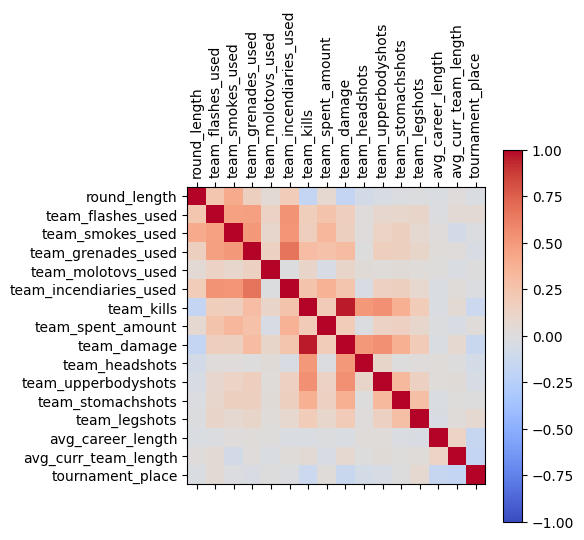

In [101]:
plt_pypl.figure(figsize=(10, 8))
plt_pypl.matshow(ct_teams_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt_pypl.colorbar()
plt_pypl.xticks(range(len(ct_teams_corr.columns)), ct_teams_corr.columns, rotation=90)
plt_pypl.yticks(range(len(ct_teams_corr.index)), ct_teams_corr.index)

ct_teams_corr_filtered = ct_teams_corr.stack().reset_index()
ct_teams_corr_filtered.columns = ['Column 0', 'Column 1', 'correlation']
ct_teams_corr_filtered['strength_category'] = ct_teams_corr_filtered['correlation'].apply(classify_correlation)

ct_teams_corr_filtered = ct_teams_corr_filtered[ct_teams_corr_filtered['Column 0'] < ct_teams_corr_filtered['Column 1']]
ct_teams_corr_filtered = ct_teams_corr_filtered[ct_teams_corr_filtered['correlation'].abs() >= 0.4]

# temporary filter pairs to remove that of metrics present in the complete aggregate statistics
prev_pairs = set(zip(significant_corrs['Column 0'], significant_corrs['Column 1'], significant_corrs['strength_category']))
ct_teams_corr_filtered = ct_teams_corr_filtered[
    ~ct_teams_corr_filtered.apply(lambda row: (row['Column 0'], row['Column 1'], row['strength_category']) in prev_pairs, axis=1)
]

ct_teams_corr_filtered.sort_values(by='correlation', ascending=False, inplace=True)
ct_teams_corr_filtered.reset_index(drop=True, inplace=True)
ct_teams_corr_filtered

We see in the filtered table above a few new correlated pairs that appear that were not present in the complete aggregate statistics, namely:
- team_incendiaries_used vs team_smokes_used
- team_flashes_used vs team_incendiaries_used
- team_flashes_used and team_grenades_used
- team_incendiaries_used and team_spent_amount
- team_grenades_used and team_spent_amount

We also see an increase team_grenades_used and team_incendiaries_used from moderate to strong.

The addition of the above metrics and the strengthening of existing metrics that include team_incendiaries_used can be attributed to the fact that incendiaries are exclusive buys to CT side. Conversely. we also observe that metrics regarding molotovs are missing from the list of moderate or stronger correlations as these utils are exclusive to T-side.

We now observe data of T side only.

,Column 0,Column 1,correlation,strength_category
0,team_headshots,team_kills,0.628490,strong
1,team_damage,team_headshots,0.622101,strong
2,team_grenades_used,team_molotovs_used,0.587822,moderate
3,team_molotovs_used,team_smokes_used,0.478147,moderate


<Figure size 1000x800 with 0 Axes>

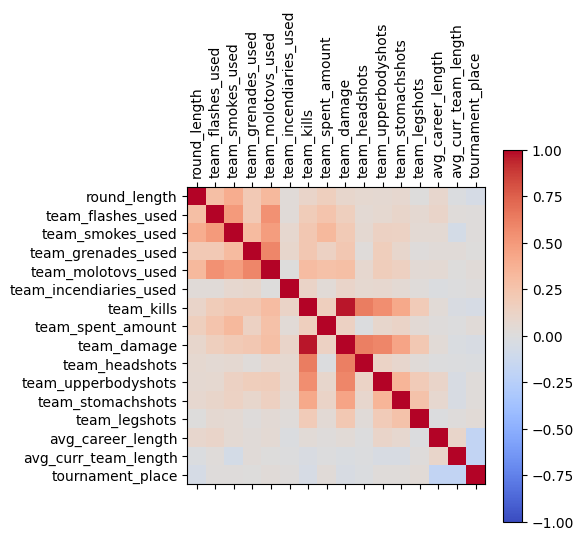

In [102]:
plt_pypl.figure(figsize=(10, 8))
plt_pypl.matshow(t_teams_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt_pypl.colorbar()
plt_pypl.xticks(range(len(t_teams_corr.columns)), t_teams_corr.columns, rotation=90)
plt_pypl.yticks(range(len(t_teams_corr.index)), t_teams_corr.index)

t_teams_corr_filtered = t_teams_corr.stack().reset_index()
t_teams_corr_filtered.columns = ['Column 0', 'Column 1', 'correlation']

t_teams_corr_filtered['strength_category'] = t_teams_corr_filtered['correlation'].apply(classify_correlation)

t_teams_corr_filtered = t_teams_corr_filtered[t_teams_corr_filtered['Column 0'] < t_teams_corr_filtered['Column 1']]
t_teams_corr_filtered = t_teams_corr_filtered[t_teams_corr_filtered['correlation'].abs() >= 0.4]

# temporary filter pairs to remove that of metrics present in the complete aggregate statistics
prev_pairs = set(zip(significant_corrs['Column 0'], significant_corrs['Column 1'], significant_corrs['strength_category']))
t_teams_corr_filtered = t_teams_corr_filtered[
    ~t_teams_corr_filtered.apply(lambda row: (row['Column 0'], row['Column 1'], row['strength_category']) in prev_pairs, axis=1)
]

t_teams_corr_filtered.sort_values(by='correlation', ascending=False, inplace=True)
t_teams_corr_filtered.reset_index(drop=True, inplace=True)

t_teams_corr_filtered

For T side, we see a few new correlated pairs that appear that were not present in the complete aggregate statistics, namely:
- team_grenades_used and team_molotovs_used
- team_molotovs_used and team_smokes_used
- team_molotovs_used and team_spent_amount
- team_damage and team_stomachshots

Metrics that changed enough in strength to change classification include:
- team_headshots and team_kills: from moderate to strong
- team_damage and team_headshots: from moderate to strong

Similar to the CT side, the addition of the above metrics and the strengthening of existing metrics that include team_molotovs_used can be attributed to the fact that molotovs are exclusive to T side. Conversely, we also observe that metrics regarding incendiaries are missing from the list of moderate or stronger correlations as these utils are exclusive to CT-side.

Another intreseting observations to make here is there is now a correlation between team_damage and team_stomachshots


Now that we have observed how each column correlates with each other on both a complete and per-side basis, this time we look at the correlation of the win rate of each team against the other columns of our data set. This time we aggregate data by map_id as we want to observe the correlation of the win rate of a team against the other columns of our data set. In the following code block, we first aggregate the data per round and get the total, from there, we select the median of each column and then compare against the win rate of each team. We do this because we have observed that in most of the metrics, much of the data is positively skewed, hence we use the median as a better measure of central tendency. Again we filter out the first rounds of each halves (i.e. rounds 1 and 13) as these are when the team economy is consistent to both sides with all members starting with $800.

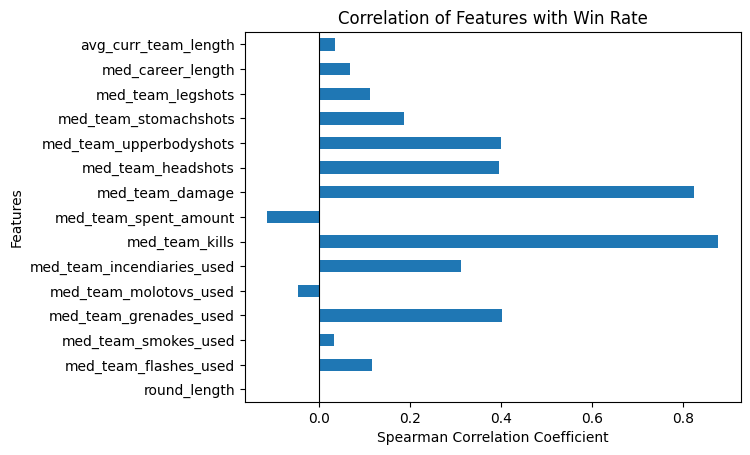

round_length                  0.000000
med_team_flashes_used         0.116031
med_team_smokes_used          0.032077
med_team_grenades_used        0.402534
med_team_molotovs_used       -0.046218
med_team_incendiaries_used    0.312715
med_team_kills                0.876486
med_team_spent_amount        -0.113763
med_team_damage               0.823723
med_team_headshots            0.394464
med_team_upperbodyshots       0.398730
med_team_stomachshots         0.186390
med_team_legshots             0.111981
med_career_length             0.067127
avg_curr_team_length          0.034206
dtype: float64

In [103]:
# filter out pistol rounds
win_rates_df = demos[
    (demos["round_number"] != 1) & (demos["round_number"] != 13)
].copy()

win_rates_df["team_won"] = (
    (
        (win_rates_df["team_name"] == win_rates_df["round_ct_team"])
        & (win_rates_df["round_result"] == "CT")
    )
    | (
        (win_rates_df["team_name"] != win_rates_df["round_ct_team"])
        & (win_rates_df["round_result"] == "T")
    )
).astype(int)


total_incendiaries_used = win_rates_df["player_incendiaries_used"].sum()
avg_incendiaries_per_round = (
    total_incendiaries_used / win_rates_df["round_id"].nunique()
)


# aggregate by team_name, map_id, and round_id
team_stats_normalized = (
    win_rates_df.groupby(["team_name", "map_id", "round_id", "round_number"])
    .agg(
        {
            "round_length": "mean",
            "player_flashes_used": "sum",
            "player_smokes_used": "sum",
            "player_grenades_used": "sum",
            "player_molotovs_used": "sum",
            "player_incendiaries_used": "sum",
            "player_kills": "sum",
            "player_spent_amount": "sum",
            "player_damage": "sum",
            "player_headshots": "sum",
            "player_upperbodyshots": "sum",
            "player_stomachshots": "sum",
            "player_legshots": "sum",
            "career_length": "mean",
            "curr_team_length": "mean",
            "team_won": "mean",
        }
    )
    .reset_index()
)

# get the median of the round totals
team_stats_normalized = team_stats_normalized.groupby(["team_name", "map_id"]).agg(
    {
        "round_length": "mean",
        "player_flashes_used": "median",
        "player_smokes_used": "median",
        "player_grenades_used": "median",
        "player_molotovs_used": "median",
        "player_incendiaries_used": "median",
        "player_kills": "median",
        "player_spent_amount": "median",
        "player_damage": "median",
        "player_headshots": "median",
        "player_upperbodyshots": "median",
        "player_stomachshots": "median",
        "player_legshots": "median",
        "career_length": "mean",
        "curr_team_length": "mean",
        "team_won": "mean",
    }
)

team_stats_normalized = team_stats_normalized.rename(
    columns={
        "player_flashes_used": "med_team_flashes_used",
        "player_smokes_used": "med_team_smokes_used",
        "player_grenades_used": "med_team_grenades_used",
        "player_molotovs_used": "med_team_molotovs_used",
        "player_incendiaries_used": "med_team_incendiaries_used",
        "player_kills": "med_team_kills",
        "player_spent_amount": "med_team_spent_amount",
        "player_damage": "med_team_damage",
        "player_headshots": "med_team_headshots",
        "player_upperbodyshots": "med_team_upperbodyshots",
        "player_stomachshots": "med_team_stomachshots",
        "player_legshots": "med_team_legshots",
        "career_length": "med_career_length",
        "curr_team_length": "avg_curr_team_length",
        "team_won": "win_rate",
    }
)

teams_win_rate_corr = team_stats_normalized.corrwith(
    team_stats_normalized["win_rate"], method="spearman"
)

# filter win_rate out of the correlation series
teams_win_rate_corr = teams_win_rate_corr[teams_win_rate_corr.index != "win_rate"]

teams_win_rate_corr.plot(kind="barh")
plt_pypl.title("Correlation of Features with Win Rate")
plt_pypl.xlabel("Spearman Correlation Coefficient")
plt_pypl.ylabel("Features")
plt_pypl.axvline(0, color="black", linewidth=0.8)
plt_pypl.show()

teams_win_rate_corr

Filtering the above correlations to get significant correlations, we get the following columns with moderate or stronger correlations with win rate:

In [104]:
significant_corrs = teams_win_rate_corr[teams_win_rate_corr.abs() >= 0.4]
significant_corrs.sort_values(ascending=False, inplace=True)
significant_corrs

med_team_kills            0.876486
med_team_damage           0.823723
med_team_grenades_used    0.402534
dtype: float64

We see here that there are two strong correlations of team kills and team damage to the win rate of a team. Let's observe how each team performed during IEM Dallas in terms of win rate.

<Figure size 1200x600 with 0 Axes>

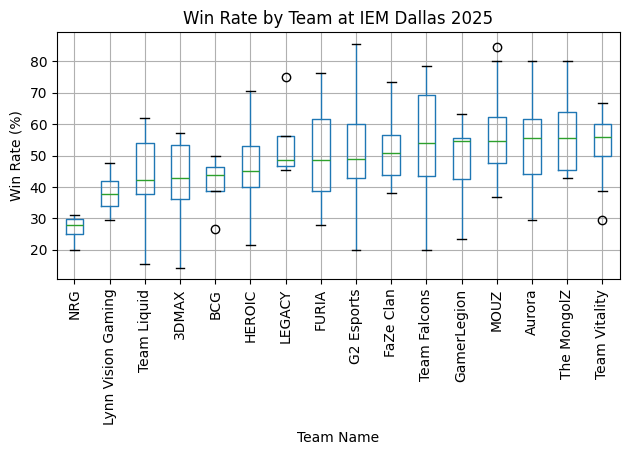

In [112]:
# plot it by team_name
plt_pypl.figure(figsize=(12, 6))

# Order teams by median win rate
ordered_teams = (
    team_stats_normalized.groupby("team_name")["win_rate"]
    .median()
    .sort_values(ascending=True)
    .index
)

# Reindex to order by median win rate
team_stats_normalized_ordered = team_stats_normalized.reset_index()
team_stats_normalized_ordered["team_name"] = pd.Categorical(
    team_stats_normalized_ordered["team_name"], categories=ordered_teams, ordered=True
)
team_stats_normalized_ordered = team_stats_normalized_ordered.sort_values("team_name")

team_stats_normalized_ordered.boxplot(column="win_rate", by="team_name", rot=90)
plt_pypl.title("Win Rate by Team at IEM Dallas 2025")
plt_pypl.suptitle("")
plt_pypl.xlabel("Team Name")
plt_pypl.ylabel("Win Rate (%)")
plt_pypl.grid(True)
plt_pypl.tight_layout()
plt_pypl.show()

The above graph outlines the win rate of each team in IEM Dallas, we notice here that each team has had varying 

### Players - Exploratory Data Analysis
#### EDA Question 2: What observations can be formed from the visualizations of the aggregate metrics of players at IEM Dallas 2025?

First we want to check for a correlation between a player's career length and longevity on their current team, and how it correlates to other columns in our data set.

,round_length,player_flashes_used,player_smokes_used,player_grenades_used,player_molotovs_used,player_incendiaries_used,player_kills,player_spent_amount,player_damage,player_headshots,player_upperbodyshots,player_stomachshots,player_legshots,career_length,curr_team_length,win_rate
round_length,1.000000,0.108754,0.175867,0.092986,0.117759,0.022573,0.161510,-0.075272,0.129523,0.172716,-0.001645,-0.016030,-0.141166,-0.123566,0.129700,0.191176
player_flashes_used,0.108754,1.000000,0.517652,-0.028048,0.172845,0.250414,0.234474,0.253402,0.139052,-0.068677,-0.117105,-0.003923,0.145354,0.321812,0.116106,0.220507
player_smokes_used,0.175867,0.517652,1.000000,0.290104,0.335777,0.526112,-0.010511,0.339387,-0.085491,-0.037401,0.129968,0.148361,0.137574,0.135715,0.153037,0.257534
player_grenades_used,0.092986,-0.028048,0.290104,1.000000,0.593261,0.456278,0.246311,0.300811,0.370001,0.449693,0.533955,0.388427,0.254690,0.046706,0.101270,0.219084
player_molotovs_used,0.117759,0.172845,0.335777,0.593261,1.000000,0.373124,-0.024800,0.248990,0.142430,0.139570,0.294378,0.216477,0.276581,0.030718,0.219632,0.000651
player_incendiaries_used,0.022573,0.250414,0.526112,0.456278,0.373124,1.000000,0.142275,0.491131,0.161557,0.263508,0.440443,0.454806,0.346053,-0.024867,0.214210,0.364596
player_kills,0.161510,0.234474,-0.010511,0.246311,-0.024800,0.142275,1.000000,0.383351,0.880489,0.472660,0.408509,0.322200,0.262898,-0.082629,-0.016526,0.480119
player_spent_amount,-0.075272,0.253402,0.339387,0.300811,0.248990,0.491131,0.383351,1.000000,0.440410,0.350506,0.468106,0.472171,0.468447,0.009895,0.056658,0.410471
player_damage,0.129523,0.139052,-0.085491,0.370001,0.142430,0.161557,0.880489,0.440410,1.000000,0.614078,0.557610,0.421452,0.396631,-0.092279,0.043878,0.410529
player_headshots,0.172716,-0.068677,-0.037401,0.449693,0.139570,0.263508,0.472660,0.350506,0.614078,1.000000,0.508889,0.260588,0.282152,-0.126278,-0.062995,0.235419


<Figure size 1000x800 with 0 Axes>

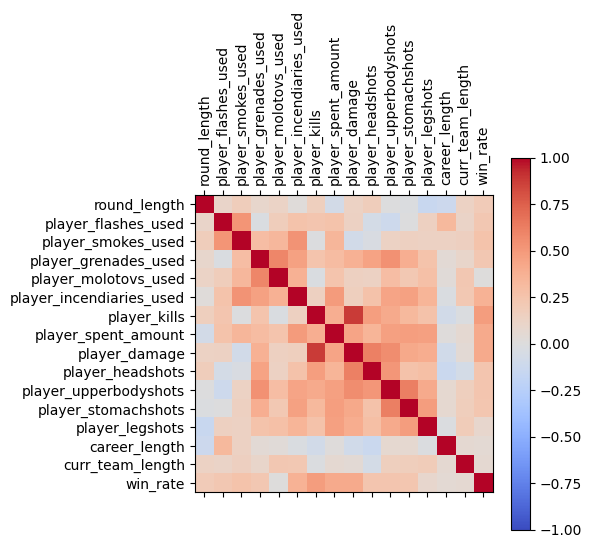

In [ ]:
# aggregate player data with respect to the number of rounds they played

players_df = demos

players_df["win_rate"] = (
    (
        (players_df["team_name"] == players_df["round_ct_team"])
        & (players_df["round_result"] == "CT")
    )
    | (
        (players_df["team_name"] != players_df["round_ct_team"])
        & (players_df["round_result"] == "T")
    )
).astype(int)

players_df = demos.groupby(["player_name", "map_id"]).agg(
    {
        "round_length": "mean",
        "player_flashes_used": "sum",
        "player_smokes_used": "sum",
        "player_grenades_used": "sum",
        "player_molotovs_used": "sum",
        "player_incendiaries_used": "sum",
        "player_kills": "sum",
        "player_spent_amount": "sum",
        "player_damage": "sum",
        "player_headshots": "sum",
        "player_upperbodyshots": "sum",
        "player_stomachshots": "sum",
        "player_legshots": "sum",
        "career_length": "mean",
        "curr_team_length": "mean",
        "win_rate": "mean",
    }
)

players_df = players_df.groupby("player_name").agg(
    {
        "round_length": "mean",
        "player_flashes_used": "median",
        "player_smokes_used": "median",
        "player_grenades_used": "median",
        "player_molotovs_used": "median",
        "player_incendiaries_used": "median",
        "player_kills": "median",
        "player_spent_amount": "median",
        "player_damage": "median",
        "player_headshots": "median",
        "player_upperbodyshots": "median",
        "player_stomachshots": "median",
        "player_legshots": "median",
        # these two should be the exact same regardless of median or mean
        "career_length": "mean",
        "curr_team_length": "mean",
        # player win rate is number of wins / total
        "win_rate": "mean",
    }
)

players_corr = players_df.corr(method="spearman")

plt_pypl.figure(figsize=(10, 8))
plt_pypl.matshow(players_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt_pypl.colorbar()
plt_pypl.xticks(range(len(players_corr.columns)), players_corr.columns, rotation=90)
plt_pypl.yticks(range(len(players_corr.index)), players_corr.index)


players_corr

Filtering metrics that have strong or very strong correlations, we get the following:

In [ ]:
stacked = players_corr.stack().reset_index()
stacked.columns = ['Column 0', 'Column 1', 'correlation']

# filter self-correlations and symmetric duplicates
stacked = stacked[stacked['Column 0'] < stacked['Column 1']]

# filter correlations to moderate or stronger correlations
significant_corrs = stacked[stacked['correlation'].abs() >= 0.4]

significant_corrs = significant_corrs.sort_values(by=['correlation'], ascending=False).reset_index(drop=True)
significant_corrs

,Column 0,Column 1,correlation
0,player_damage,player_kills,0.880489
1,player_stomachshots,player_upperbodyshots,0.617314
2,player_damage,player_headshots,0.614078
3,player_grenades_used,player_molotovs_used,0.593261
4,player_damage,player_upperbodyshots,0.557610
5,player_grenades_used,player_upperbodyshots,0.533955
6,player_incendiaries_used,player_smokes_used,0.526112
7,player_flashes_used,player_smokes_used,0.517652
8,player_headshots,player_upperbodyshots,0.508889
9,player_incendiaries_used,player_spent_amount,0.491131


As shown in the list of moderate or stronger correlations, there appears to be no correlation between a player's overall or team longevity to any other columns or observations in our data set. This is interesting in the sense that it was assumed that a player's longevity in competitive Counter-Strike would have at least have some correlation to metrics such as kills, damage dealt, or even win rate.

### Maps - Exploratory Data Analysis
#### EDA Question #3: What specific metrics are influenced by maps?

First we aggregate by round number and team, then we aggregate by map name. We won't drop the first and last rounds of each half as we do not concern ourselves

With respect to maps, let's peek at `smokes.csv` to see what information we can get with respect to specific maps.

In [ ]:
smokes.head(10)

,entityid,tick,user_name,x,y,z,round_number,map_name,matchid,mapid,player_team,winner,team_name,is_win,start_tick,round_tick
0,169,12792,s1mple,-1122.86560,-869.907400,34.713615,3,de_ancient,0,0,FaZe Clan,CT,CT,True,11063,1729
1,90,14385,EliGE,1100.84220,-278.237980,117.153130,3,de_ancient,0,0,FaZe Clan,CT,CT,True,11063,3322
2,279,15567,Skullz,1262.36410,-237.993740,111.616290,3,de_ancient,0,0,FaZe Clan,CT,CT,True,11063,4504
3,186,21584,NAF,-522.72723,296.841130,162.031280,4,de_ancient,0,0,Team Liquid,T,T,True,19930,1654
4,463,21679,EliGE,-1142.09720,-899.746800,35.276768,4,de_ancient,0,0,FaZe Clan,T,CT,False,19930,1749
5,198,21913,ultimate,881.11926,-770.223000,30.028742,4,de_ancient,0,0,Team Liquid,T,T,True,19930,1983
6,243,22526,NertZ,-854.42773,-114.491806,82.925870,4,de_ancient,0,0,Team Liquid,T,T,True,19930,2596
7,365,22572,karrigan,356.43665,-925.062500,156.315610,4,de_ancient,0,0,FaZe Clan,T,CT,False,19930,2642
8,167,22992,Skullz,1191.58890,-282.035430,109.900986,4,de_ancient,0,0,FaZe Clan,T,CT,False,19930,3062
9,154,23033,frozen,-1049.75680,-797.737550,35.971947,4,de_ancient,0,0,FaZe Clan,T,CT,False,19930,3103


We see here a few columns of interest, particularly its coordinates, we can use these to cluster and plot the smoke lineups on a map.